In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
sgemm = pd.read_csv("C:/Users/priya/OneDrive/Namrata UTD/Sem2/AppliedMachineLearning-Farooq-BUAN6341/Assignment1/Dataset/sgemm_product.csv")
#First few rows of the data set
sgemm.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
sgemm["Run"]=(sgemm["Run1 (ms)"] + sgemm["Run2 (ms)"] + sgemm["Run3 (ms)"] + sgemm["Run4 (ms)"])/4
sgemm.drop(["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1,inplace=True)
sgemm["Run"]=round(sgemm["Run"],0)
sgemm["Run"]=sgemm["Run"].astype('int')
sgemm

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,79
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,81
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,87
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,18
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28


In [4]:
#Normalizing the dataset
sgemm = (sgemm - sgemm.mean()/sgemm.std())
#Finding mean and median of the dataset
#sgemm.loc[:,"Run"].mean()
sgemm.loc[:,"Run"].median()

69.40997615815193

In [5]:
#Binary classification of the dataset
sgemm["Run"] = np.where(sgemm["Run"]>69.409, 1, 0)

In [6]:
sgemm = sgemm.sample(frac =.40, random_state=1111)

In [7]:
y = sgemm['Run']
X = sgemm.drop('Run', axis=1)

1    48542
0    48098
Name: Run, dtype: int64

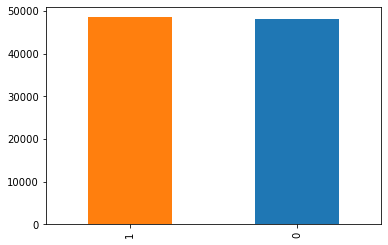

In [8]:
#Plot the classes
classes = pd.value_counts(sgemm["Run"], sort = True)
classes.plot(kind = 'bar', color=['C1', 'C0'])
classes

In [9]:
#Test-Train Split
sgemm_train, sgemm_test, Run_train, Run_test = train_test_split(X,y, test_size = 0.30)

In [10]:
scaler = MinMaxScaler()
sgemm_train = scaler.fit_transform(sgemm_train)
sgemm_test = scaler.transform(sgemm_test)

# SUPPORT VECTOR MACHINES
LINEAR KERNEL

In [11]:
## Training algorithm (Linear Kernel)
svclassifier = SVC (kernel = 'linear')
svclassifier.fit(sgemm_train, Run_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
predict_run = svclassifier.predict(sgemm_test)

In [32]:
accuracy_run_linear = accuracy_score(Run_test,predict_run)
accuracy_run_linear

0.8281939845474614

0.8235752488223
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14405
           1       0.85      0.80      0.82     14587

    accuracy                           0.83     28992
   macro avg       0.83      0.83      0.83     28992
weighted avg       0.83      0.83      0.83     28992



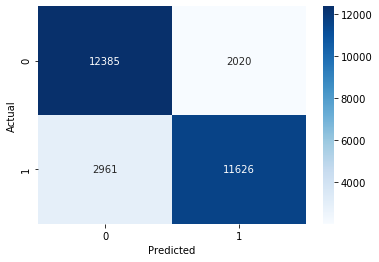

In [13]:
cm_run = confusion_matrix(Run_test,predict_run)
sns.heatmap(cm_run,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Run_test,predict_run))

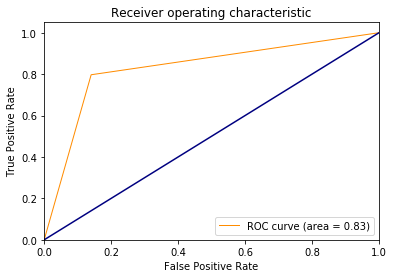

In [14]:
fpr, tpr, threshold = roc_curve(Run_test,predict_run)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
accuracy_CV = cross_val_score(svclassifier, sgemm_test, Run_test, scoring='accuracy', cv = 5)
print(accuracy_CV)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy_CV.mean() * 100)

[0.82428005 0.82600448 0.82459469 0.82907899 0.82597447]
Accuracy of Model with Cross Validation is: 82.59865372703754


In [25]:
def plot_learning_curve(estimator, title, X_dt, y_dt, ylim, cv, n_jobs, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_dt, y_dt, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

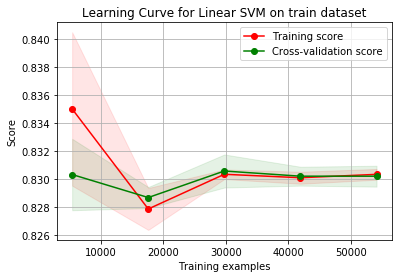

In [18]:
title = "Learning Curve for Linear SVM on train dataset"
estimator = svclassifier
plot_learning_curve(estimator, title, sgemm_train, Run_train, None, 5, None)
plt.show()


GUASSIAN KERNEL

In [29]:
rbf_svclassifier = SVC (kernel = 'rbf')
rbf_svclassifier.fit(sgemm_train, Run_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
rbf_predict = rbf_svclassifier.predict(sgemm_test)
rbf_accuracy = accuracy_score(Run_test,rbf_predict)
rbf_accuracy

0.9406387969094923

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14405
           1       0.97      0.91      0.94     14587

    accuracy                           0.94     28992
   macro avg       0.94      0.94      0.94     28992
weighted avg       0.94      0.94      0.94     28992



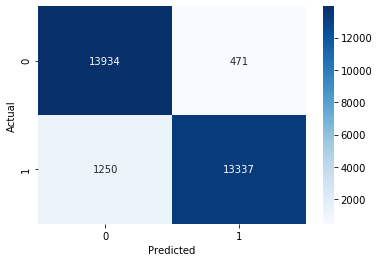

In [21]:
rbf_cm = confusion_matrix(Run_test,rbf_predict)
sns.heatmap(rbf_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Run_test,rbf_predict))

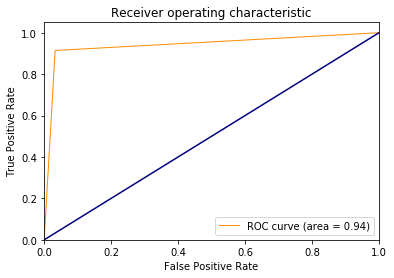

In [22]:
fpr, tpr, threshold = roc_curve(Run_test,rbf_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

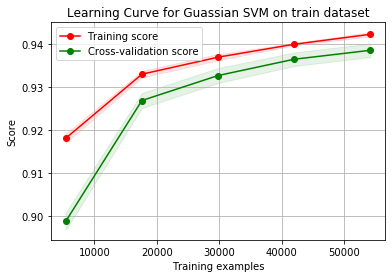

In [23]:
title = "Learning Curve for Guassian SVM on train dataset"
estimator = rbf_svclassifier
plot_learning_curve(estimator, title, sgemm_train, Run_train, None, 5, None)
plt.show()

 
POLYNOMIAL KERNEL

In [24]:
poly_svclassifier = SVC (kernel = 'poly')
poly_svclassifier.fit(sgemm_train, Run_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
poly_predict = poly_svclassifier.predict(sgemm_test)
poly_accuracy = accuracy_score(Run_test,poly_predict)
poly_accuracy

0.9344991721854304

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14405
           1       0.96      0.91      0.93     14587

    accuracy                           0.93     28992
   macro avg       0.94      0.93      0.93     28992
weighted avg       0.94      0.93      0.93     28992



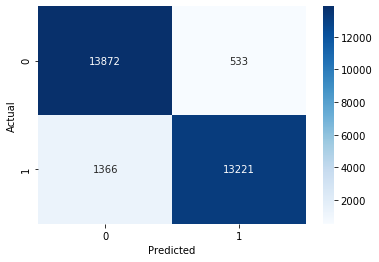

In [26]:
poly_cm = confusion_matrix(Run_test,poly_predict)
sns.heatmap(poly_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Run_test,poly_predict))

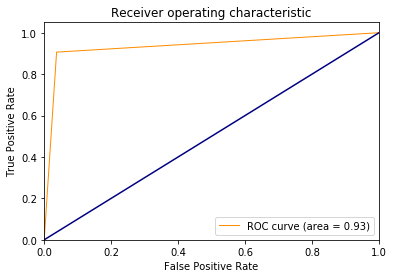

In [27]:
fpr, tpr, threshold = roc_curve(Run_test,poly_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

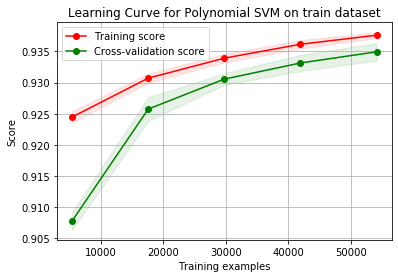

In [28]:
title = "Learning Curve for Polynomial SVM on train dataset"
estimator = poly_svclassifier
plot_learning_curve(estimator, title, sgemm_train, Run_train, None, 5, None)
plt.show()

,accuracy
Linear,0.828194
Gaussian,0.940639
Polynomial,0.934499


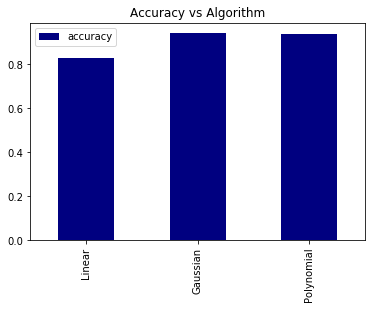

In [34]:
Accuracy_Performance= pd.DataFrame(data = [accuracy_run_linear,rbf_accuracy,poly_accuracy],index = ['Linear','Gaussian','Polynomial'],columns=[ "accuracy"])
#comparing results
Accuracy_Performance.plot(kind = 'bar',title="Accuracy vs Algorithm",color='navy')
Accuracy_Performance

# DECISION TREES

In [105]:
sgemm = pd.read_csv("C:/Users/priya/OneDrive/Namrata UTD/Sem2/AppliedMachineLearning-Farooq-BUAN6341/Assignment1/Dataset/sgemm_product.csv")
sgemm["Run"]=(sgemm["Run1 (ms)"] + sgemm["Run2 (ms)"] + sgemm["Run3 (ms)"] + sgemm["Run4 (ms)"])/4
sgemm.drop(["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1,inplace=True)
sgemm["Run"]=round(sgemm["Run"],0)
sgemm["Run"]=sgemm["Run"].astype('int')
#Normalizing the dataset
sgemm = (sgemm - sgemm.mean()/sgemm.std())
#Finding median of the dataset
sgemm.loc[:,"Run"].median()
#Binary classification of the dataset
sgemm["Run"] = np.where(sgemm["Run"]>69.409, 1, 0)
y = sgemm['Run']
X = sgemm.drop('Run', axis=1)
#Test-Train Split
sgemmtree_train, sgemmtree_test, Runtree_train, Runtree_test = train_test_split(X,y, test_size = 0.30)

In [106]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import tree

In [107]:
##Create decision tree classifier object
Decision_trees = DecisionTreeClassifier()
Decision_trees.fit(sgemmtree_train,Runtree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
#Predict the response for test dataset
tree_predict = Decision_trees.predict(sgemmtree_test)
tree_accuracy = accuracy_score(Runtree_test,tree_predict)
tree_accuracy

0.9907974613686534

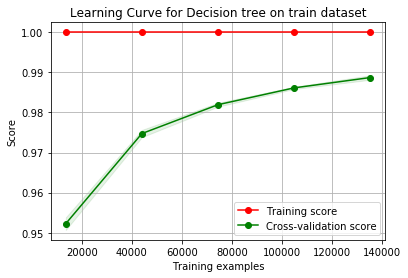

In [109]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = Decision_trees
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 5, None)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36351
           1       0.99      0.99      0.99     36129

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



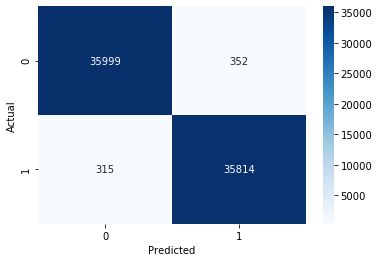

In [110]:
tree_cm = confusion_matrix(Runtree_test,tree_predict)
sns.heatmap(tree_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Runtree_test,tree_predict))

Decision Tree with Pruning - Gini Index

In [116]:
Decision_trees_gini_pruning = DecisionTreeClassifier(criterion="gini", max_depth=4, splitter = "random", 
                                                     min_samples_leaf=5)
Decision_trees_gini_pruning.fit(sgemmtree_train,Runtree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [117]:
#Predict the response for test dataset
tree_predict_gini_pruning = Decision_trees_gini_pruning.predict(sgemmtree_test)
tree_accuracy_gini_pruning = accuracy_score(Runtree_test,tree_predict_gini_pruning)
tree_accuracy_gini_pruning

0.7619481236203091

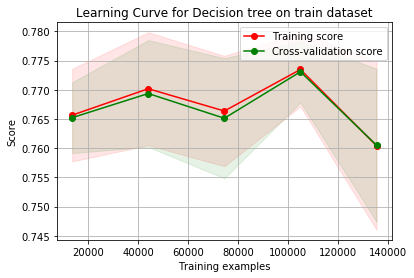

In [121]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = Decision_trees_gini_pruning
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 5, None)
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     36351
           1       0.75      0.77      0.76     36129

    accuracy                           0.76     72480
   macro avg       0.76      0.76      0.76     72480
weighted avg       0.76      0.76      0.76     72480



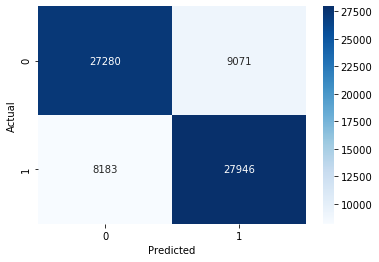

In [123]:
gini_tree_cm = confusion_matrix(Runtree_test,tree_predict_gini_pruning)
sns.heatmap(gini_tree_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Runtree_test,tree_predict_gini_pruning))

Decision Tree with Pruning - Entropy

In [119]:
Decision_trees_entropy_pruning = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter = "random", 
                                                     min_samples_leaf=4)
Decision_trees_entropy_pruning.fit(sgemmtree_train,Runtree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [120]:
#Predict the response for test dataset
tree_predict_entropy_pruning = Decision_trees_entropy_pruning.predict(sgemmtree_test)
tree_accuracy_entropy_pruning = accuracy_score(Runtree_test,tree_predict_entropy_pruning)
tree_accuracy_entropy_pruning

0.7156318984547462

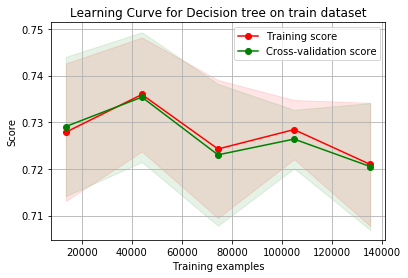

In [122]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = Decision_trees_entropy_pruning
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 5, None)
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     36351
           1       0.68      0.80      0.74     36129

    accuracy                           0.72     72480
   macro avg       0.72      0.72      0.71     72480
weighted avg       0.72      0.72      0.71     72480



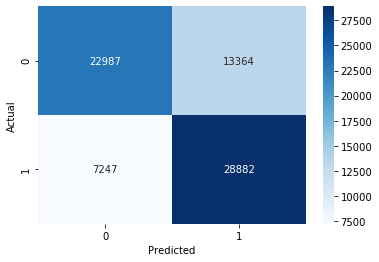

In [124]:
entropy_tree_cm = confusion_matrix(Runtree_test,tree_predict_entropy_pruning)
sns.heatmap(entropy_tree_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(Runtree_test,tree_predict_entropy_pruning))

,accuracy
Decision tree,0.990797
Pruned decision tree 1,0.761948
Pruned decision tree 2,0.715632


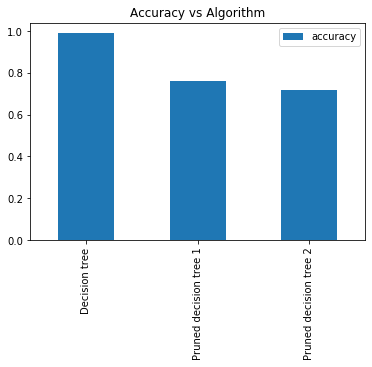

In [125]:
DecisionTree_Accuracy_Performance = pd.DataFrame(data = [tree_accuracy, tree_accuracy_gini_pruning, tree_accuracy_entropy_pruning],index = ['Decision tree','Pruned decision tree 1', 'Pruned decision tree 2'],columns=[ "accuracy"])
#comparing results
DecisionTree_Accuracy_Performance.plot(kind = 'bar',title="Accuracy vs Algorithm")
DecisionTree_Accuracy_Performance

# Boosting - Decision Trees

Boosting on Decision Trees

In [127]:
boosting_tree = AdaBoostClassifier(n_estimators=50, base_estimator=Decision_trees, learning_rate = 1)
model_boost=boosting_tree.fit(sgemmtree_train, Runtree_train)
boosting_predict = model_boost.predict(sgemmtree_test)

In [128]:
accuracy_boosting = metrics.accuracy_score(Runtree_test, boosting_predict)
print("Accuracy:",metrics.accuracy_score(Runtree_test, boosting_predict))

Accuracy: 0.990976821192053


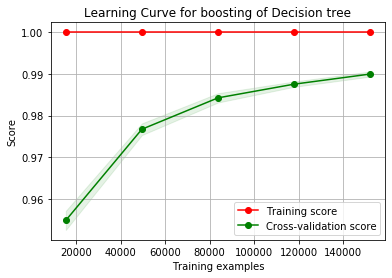

In [129]:
title = "Learning Curve for boosting of Decision tree"
estimator = boosting_tree
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 10, None)
plt.show()

 
Boosting on Pruned Decision Tree - Gini

In [130]:
boosting_tree1 = AdaBoostClassifier(n_estimators=50, base_estimator=Decision_trees_gini_pruning, learning_rate = 1)
model_boost1=boosting_tree1.fit(sgemmtree_train, Runtree_train)
boosting_predict1 = model_boost1.predict(sgemmtree_test)

In [131]:
accuracy_boosting1 = metrics.accuracy_score(Runtree_test, boosting_predict1)
print("Accuracy:",metrics.accuracy_score(Runtree_test, boosting_predict1))

Accuracy: 0.9641004415011037


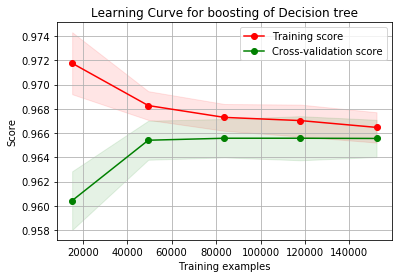

In [133]:
title = "Learning Curve for boosting of Decision tree"
estimator = boosting_tree1
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 10, None)
plt.show()

In [141]:
accuracyCV_boosttree1 = cross_val_score(boosting_tree1, sgemmtree_train, Runtree_train, scoring='accuracy', cv = 10)
print(accuracyCV_boosttree1)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracyCV_boosttree1.mean() * 100)

[0.96511353 0.96600047 0.9650544  0.96079707 0.96422658 0.96440397
 0.96493614 0.96647351 0.96517266 0.96623699]
Accuracy of Model with Cross Validation is: 96.48415326395457


 
Boosting on Pruned Decision Tree - Entropy

In [134]:
boosting_tree2 = AdaBoostClassifier(n_estimators=50, base_estimator=Decision_trees_entropy_pruning, learning_rate = 1)
model_boost2=boosting_tree2.fit(sgemmtree_train, Runtree_train)
boosting_predict2 = model_boost2.predict(sgemmtree_test)

In [135]:
accuracy_boosting2 = metrics.accuracy_score(Runtree_test, boosting_predict2)
print("Accuracy:",metrics.accuracy_score(Runtree_test, boosting_predict2))

Accuracy: 0.9441777041942605


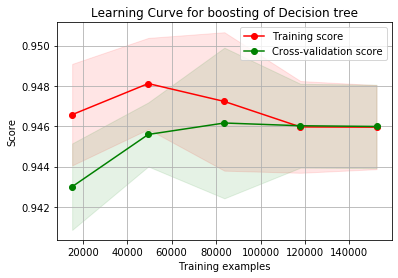

In [136]:
title = "Learning Curve for boosting of Decision tree"
estimator = boosting_tree2
plot_learning_curve(estimator, title, sgemmtree_train, Runtree_train, None, 10, None)
plt.show()

In [140]:
accuracyCV_boosttree2 = cross_val_score(boosting_tree2, sgemmtree_train, Runtree_train, scoring='accuracy', cv = 10)
print(accuracyCV_boosttree2)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracyCV_boosttree2.mean() * 100)

[0.94406339 0.94920766 0.94595553 0.94412252 0.94944418 0.94625118
 0.94134342 0.9448912  0.94500946 0.94418165]
Accuracy of Model with Cross Validation is: 94.54470198675496


,accuracy
Boosting Decision tree,0.990977
Boosting Pruned decision tree 1,0.964100
Boosting Pruned decision tree 2,0.944178


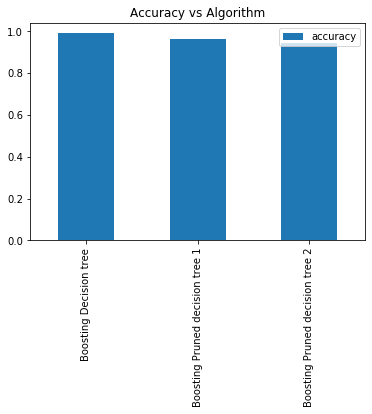

In [142]:
boost_accuracy_sgemm = pd.DataFrame(data = [accuracy_boosting, accuracy_boosting1, accuracy_boosting2],index = ['Boosting Decision tree','Boosting Pruned decision tree 1', 'Boosting Pruned decision tree 2'],columns=[ "accuracy"])
#comparing results
boost_accuracy_sgemm.plot(kind = 'bar',title="Accuracy vs Algorithm")
boost_accuracy_sgemm

# Second Dataset - Telco Churn Rate Dataset

In [11]:
churnrate = pd.read_csv("C:/Users/priya/OneDrive/Namrata UTD/Sem2/AppliedMachineLearning-Farooq-BUAN6341/Assignment2/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#First few rows of the data set
churnrate.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
churnrate.shape

(7043, 21)

In [13]:
churnrate.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Converting into binary
churnrate["Partner"].replace(["Yes","No"],[1,0],inplace =True)
churnrate["Dependents"].replace(["Yes","No"],[1,0],inplace =True)
churnrate["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)
churnrate["MultipleLines"].replace(["Yes","No", "No phone service"],[1,0,2],inplace =True)
churnrate["InternetService"].replace(["DSL","Fiber optic", "No"],[1,0,2],inplace =True)
churnrate["OnlineSecurity"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["OnlineBackup"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["DeviceProtection"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["TechSupport"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["StreamingTV"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["StreamingMovies"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
churnrate["Contract"].replace(["Month-to-month","One year", "Two year"],[1,0,2],inplace =True)
churnrate["PaperlessBilling"].replace(["Yes","No"],[1,0],inplace =True)
churnrate["PaymentMethod"].replace(["Credit card (automatic)","Electronic check", "Mailed check", "Bank transfer (automatic)"],[1,0,2,3],inplace =True)
churnrate["Churn"].replace(["Yes","No"],[1,0],inplace =True)

In [15]:
churnrate['TotalCharges'] = churnrate['TotalCharges'].replace(" ", 0).astype('float32')
churnrate.drop(['customerID'],axis=1, inplace=True)

In [16]:
# Categorizing Male and Female in 1s and 0s
def Gender(element):
    if element == 'Male':
        return 0
    elif element == 'Female':
        return 1

churnrate['Gender'] = churnrate['gender'].apply(Gender)
churnrate.drop(['gender'] ,axis = 1, inplace=True) 

In [17]:
churnrate['TotalChargesNew'] = churnrate['tenure']*churnrate['MonthlyCharges']
churnrate.drop(['MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)
churnrate.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Gender,TotalChargesNew
0,0,1,0,1,0,2,1,0,1,0,0,0,0,1,1,0,0,1,29.85
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,2,0,0,1936.30
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,1,0,107.70
3,0,0,0,45,0,2,1,1,0,1,1,0,0,0,0,3,0,0,1903.50
4,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,0,1,1,141.40


In [18]:
churnrate["TotalChargesNew"]=churnrate["TotalChargesNew"].astype('int')

In [19]:
X = churnrate.drop('Churn', axis = 1)
y= churnrate['Churn']

0    5174
1    1869
Name: Churn, dtype: int64

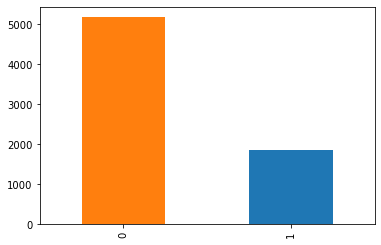

In [20]:
#Plot the classes
churnrate_classes = pd.value_counts(churnrate["Churn"], sort = True)
churnrate_classes.plot(kind = 'bar', color=['C1', 'C0'])
churnrate_classes

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
## Training algorithm (Linear Kernel)
churnclassifier = SVC (kernel = 'linear')
churnclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [158]:
churn_predict = churnclassifier.predict(X_test)
churn_accuracy_linear = accuracy_score(y_test,churn_predict)
churn_accuracy_linear

0.7884524372929484

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1569
           1       0.61      0.51      0.55       544

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



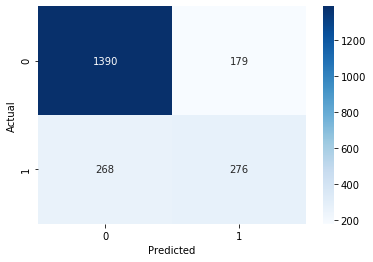

In [159]:
churn_cm = confusion_matrix(y_test,churn_predict)
sns.heatmap(churn_cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_predict))

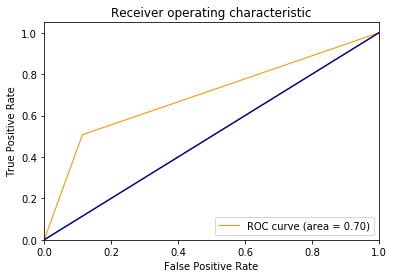

In [160]:
fpr, tpr, threshold = roc_curve(y_test,churn_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [161]:
churn_accuracy_CV = cross_val_score(churnclassifier, X_test, y_test, scoring='accuracy', cv = 10)
print(churn_accuracy_CV)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churn_accuracy_CV.mean() * 100)

[0.81132075 0.78301887 0.79245283 0.77725118 0.80094787 0.78672986
 0.77251185 0.77725118 0.77251185 0.77725118]
Accuracy of Model with Cross Validation is: 78.51247429133507


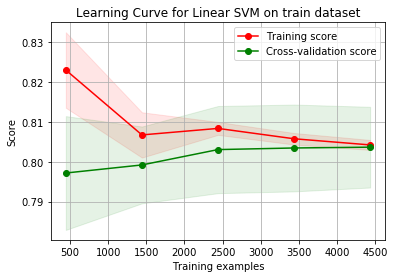

In [162]:
title = "Learning Curve for Linear SVM on train dataset"
estimator = churnclassifier
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

Guassian Kernel

In [163]:
churnclassifier_rbf = SVC (kernel = 'rbf')
churnclassifier_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
churn_predict_rbf = churnclassifier_rbf.predict(X_test)
churn_accuracy_rbf = accuracy_score(y_test,churn_predict_rbf)
churn_accuracy_rbf

0.792238523426408

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1569
           1       0.63      0.45      0.53       544

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



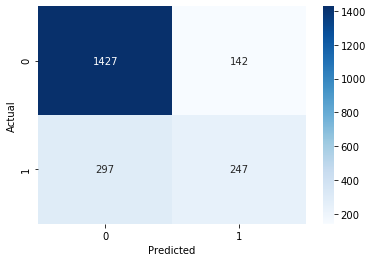

In [165]:
churn_cm1 = confusion_matrix(y_test,churn_predict_rbf)
sns.heatmap(churn_cm1,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_predict_rbf))

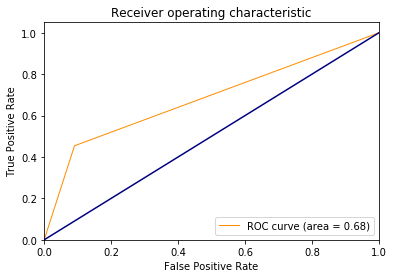

In [166]:
fpr, tpr, threshold = roc_curve(y_test,churn_predict_rbf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [167]:
churn_accuracy_CV1 = cross_val_score(churnclassifier_rbf, X_test, y_test, scoring='accuracy', cv = 10)
print(churn_accuracy_CV1)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churn_accuracy_CV1.mean() * 100)

[0.79716981 0.76415094 0.78773585 0.78672986 0.78672986 0.78199052
 0.78199052 0.76777251 0.75829384 0.78672986]
Accuracy of Model with Cross Validation is: 77.99293570598229


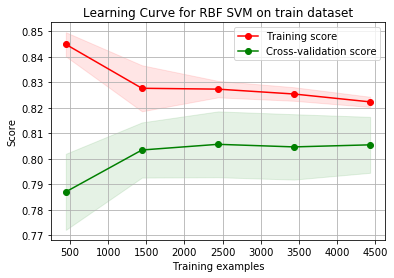

In [168]:
title = "Learning Curve for RBF SVM on train dataset"
estimator = churnclassifier_rbf
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

Polynomial Kernel

In [169]:
churnclassifier_poly = SVC (kernel = 'poly')
churnclassifier_poly.fit(X_train, y_train)
churn_predict_poly = churnclassifier_poly.predict(X_test)
churn_accuracy_poly = accuracy_score(y_test,churn_predict_poly)
churn_accuracy_poly

0.79649787032655

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1569
           1       0.64      0.47      0.54       544

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113



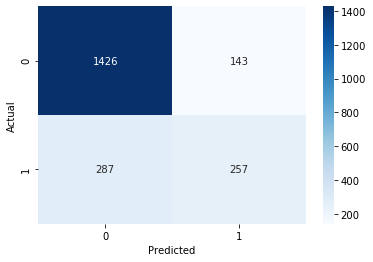

In [170]:
churn_cm2 = confusion_matrix(y_test,churn_predict_poly)
sns.heatmap(churn_cm2,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_predict_poly))

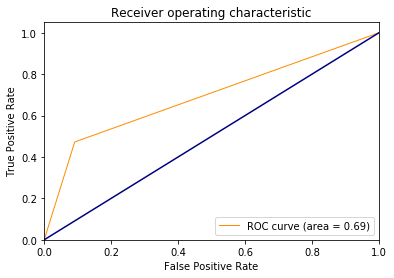

In [171]:
fpr, tpr, threshold = roc_curve(y_test,churn_predict_poly)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [172]:
churn_accuracy_CV2 = cross_val_score(churnclassifier_poly, X_test, y_test, scoring='accuracy', cv = 10)
print(churn_accuracy_CV2)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churn_accuracy_CV2.mean() * 100)

[0.79716981 0.78301887 0.75943396 0.75829384 0.77251185 0.77725118
 0.76303318 0.76777251 0.77251185 0.78199052]
Accuracy of Model with Cross Validation is: 77.32987570419387


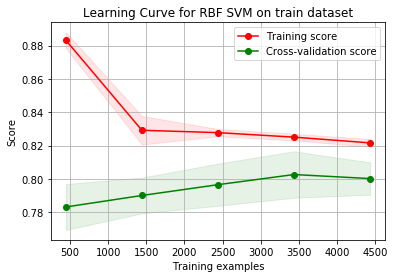

In [173]:
title = "Learning Curve for RBF SVM on train dataset"
estimator = churnclassifier_poly
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

,accuracy
Linear,0.788452
Gaussian,0.792239
Polynomial,0.796498


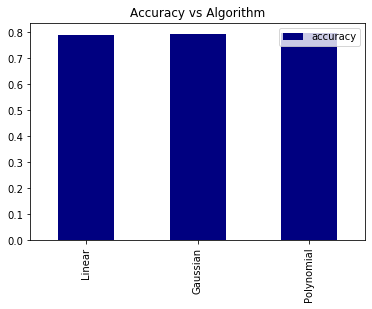

In [176]:
Churn_Accuracy_Performance= pd.DataFrame(data = [churn_accuracy_linear,churn_accuracy_rbf,churn_accuracy_poly],index = ['Linear','Gaussian','Polynomial'],columns=[ "accuracy"])
#comparing results
Churn_Accuracy_Performance.plot(kind = 'bar',title="Accuracy vs Algorithm",color='navy')
Churn_Accuracy_Performance

# Decision Trees

In [26]:
##Create decision tree classifier object
churn_tree = DecisionTreeClassifier()
churn_tree.fit(X_train, y_train)
#Predict the response for test dataset
churn_tree_predict = churn_tree.predict(X_test)
churntree_accuracy = accuracy_score(y_test,churn_tree_predict)
churntree_accuracy

0.718409843823947

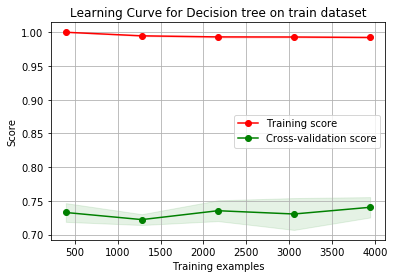

In [27]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = churn_tree
plot_learning_curve(estimator, title, X_train, y_train, None, 5, None)
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1544
           1       0.48      0.46      0.47       569

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



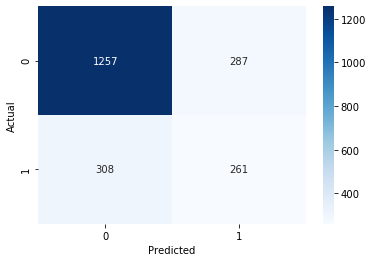

In [29]:
churntree_cm = confusion_matrix(y_test,churn_tree_predict)
sns.heatmap(churntree_cm,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_tree_predict))

In [30]:
churntree_accuracy_CV = cross_val_score(churn_tree, X_test, y_test, scoring='accuracy', cv = 10)
print(churntree_accuracy_CV)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churntree_accuracy_CV.mean() * 100)

[0.69811321 0.71226415 0.73113208 0.7014218  0.7535545  0.72037915
 0.7535545  0.77251185 0.72511848 0.69668246]
Accuracy of Model with Cross Validation is: 72.64732182777432


In [31]:
##Create decision tree classifier object
churn_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter = "random")
churn_tree_gini.fit(X_train, y_train)
#Predict the response for test dataset
churn_tree_predict_gini = churn_tree_gini.predict(X_test)
churntree_accuracy1 = accuracy_score(y_test,churn_tree_predict_gini)
churntree_accuracy1

0.7539044013251301

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1544
           1       0.54      0.56      0.55       569

    accuracy                           0.75      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.75      0.75      2113



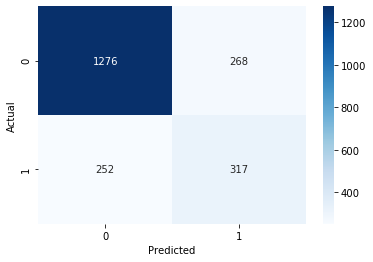

In [32]:
churntree_cm1 = confusion_matrix(y_test,churn_tree_predict_gini)
sns.heatmap(churntree_cm1,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_tree_predict_gini))

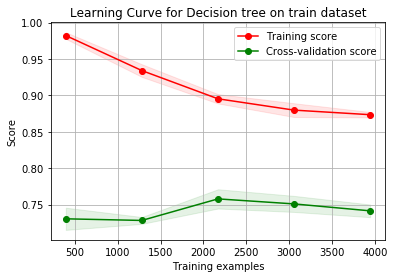

In [33]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = churn_tree_gini
plot_learning_curve(estimator, title, X_train, y_train, None, 5, None)
plt.show()

In [34]:
churntree_accuracy_CV1 = cross_val_score(churn_tree_gini, X_test, y_test, scoring='accuracy', cv = 10)
print(churntree_accuracy_CV1)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churntree_accuracy_CV1.mean() * 100)

[0.80188679 0.78301887 0.72641509 0.73933649 0.73933649 0.72985782
 0.72037915 0.77251185 0.77725118 0.65876777]
Accuracy of Model with Cross Validation is: 74.4876151301082


In [35]:
# Create decision tree classifier object
churn_tree_ent = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter = "random")
churn_tree_ent.fit(X_train, y_train)
#Predict the response for test dataset
churn_tree_predict_ent = churn_tree_ent.predict(X_test)
churntree_accuracy2 = accuracy_score(y_test,churn_tree_predict_ent)
churntree_accuracy2

0.791292001893043

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1544
           1       0.71      0.38      0.49       569

    accuracy                           0.79      2113
   macro avg       0.76      0.66      0.68      2113
weighted avg       0.78      0.79      0.77      2113



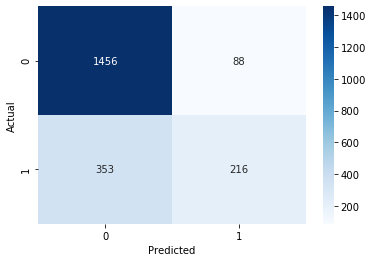

In [36]:
churntree_cm2 = confusion_matrix(y_test,churn_tree_predict_ent)
sns.heatmap(churntree_cm2,annot=True,cmap='Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test,churn_tree_predict_ent))

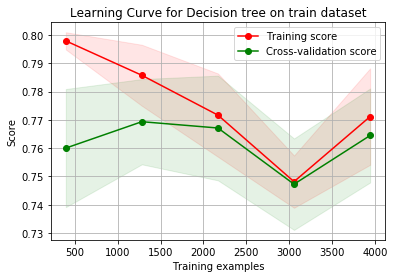

In [37]:
title = r"Learning Curve for Decision tree on train dataset"
estimator = churn_tree_ent
plot_learning_curve(estimator, title, X_train, y_train, None, 5, None)
plt.show()

In [38]:
churntree_accuracy_CV2 = cross_val_score(churn_tree_ent, X_test, y_test, scoring='accuracy', cv = 10)
print(churntree_accuracy_CV2)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",churntree_accuracy_CV2.mean() * 100)

[0.78773585 0.76415094 0.77830189 0.77251185 0.8056872  0.76777251
 0.82938389 0.75829384 0.77725118 0.77251185]
Accuracy of Model with Cross Validation is: 78.13601001520165


,accuracy
Decision tree,0.718410
Pruned decision tree 1,0.753904
Pruned decision tree 2,0.791292


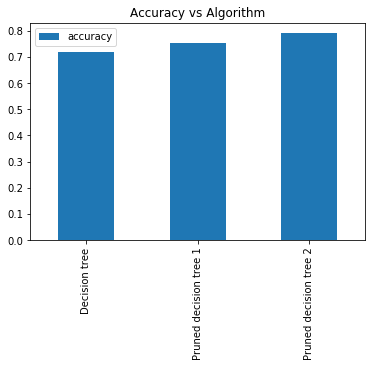

In [39]:
ChurnTree_Accuracy_Performance = pd.DataFrame(data = [churntree_accuracy, churntree_accuracy1, churntree_accuracy2],index = ['Decision tree','Pruned decision tree 1', 'Pruned decision tree 2'],columns=[ "accuracy"])
#comparing results
ChurnTree_Accuracy_Performance.plot(kind = 'bar',title="Accuracy vs Algorithm")
ChurnTree_Accuracy_Performance

# Boosting

In [40]:
## Boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
boost_tree = AdaBoostClassifier(n_estimators=50, base_estimator=churn_tree, learning_rate = 1)

model=boost_tree.fit(X_train, y_train)

y_boost_pred = model.predict(X_test)

In [42]:
ct_accuracy_boosting = accuracy_score(y_test, y_boost_pred)
ct_accuracy_boosting

0.7524846190250828

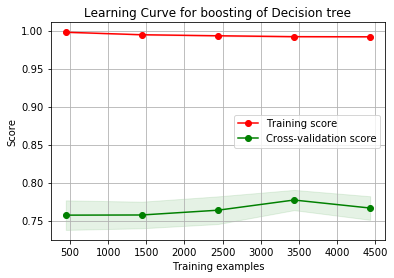

In [51]:
title = "Learning Curve for boosting of Decision tree"
estimator = boost_tree
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

In [44]:
ct_boosting_tree1 = AdaBoostClassifier(n_estimators=50, base_estimator=churn_tree_gini, learning_rate = 1)
ct_model_boost1=ct_boosting_tree1.fit(X_train, y_train)
ct_boosting_predict1 = ct_model_boost1.predict(X_test)

In [45]:
ct_accuracy_boosting1 = accuracy_score(y_test, ct_boosting_predict1)
ct_accuracy_boosting1

0.7406530998580217

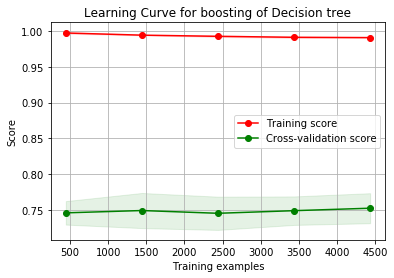

In [46]:
title = "Learning Curve for boosting of Decision tree"
estimator = ct_boosting_tree1
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

In [47]:
ct_boosting_tree2 = AdaBoostClassifier(n_estimators=50, base_estimator=churn_tree_ent, learning_rate = 1)
ct_model_boost2=ct_boosting_tree2.fit(X_train, y_train)
ct_boosting_predict2 = ct_model_boost2.predict(X_test)

In [48]:
ct_accuracy_boosting2 = accuracy_score(y_test, ct_boosting_predict2)
ct_accuracy_boosting2

0.7785139611926172

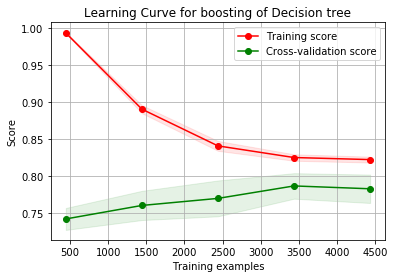

In [49]:
title = "Learning Curve for boosting of Decision tree"
estimator = ct_boosting_tree2
plot_learning_curve(estimator, title, X_train, y_train, None, 10, None)
plt.show()

,accuracy
Decision tree,0.752485
Pruned decision tree 1,0.740653
Pruned decision tree 2,0.778514


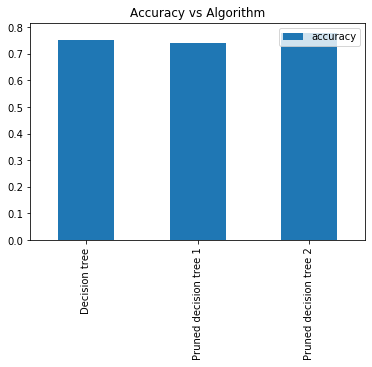

In [50]:
ChurnTree_Accuracy_Performance1 = pd.DataFrame(data = [ct_accuracy_boosting, ct_accuracy_boosting1, ct_accuracy_boosting2],index = ['Decision tree','Pruned decision tree 1', 'Pruned decision tree 2'],columns=[ "accuracy"])
#comparing results
ChurnTree_Accuracy_Performance1.plot(kind = 'bar',title="Accuracy vs Algorithm")
ChurnTree_Accuracy_Performance1